## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!

#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("real_estate.csv", delimiter=";")
print(df)
print(df.columns)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### What is the most expensive home in the dataset? (★☆☆)

In [7]:
expensive_i = df['price'].idxmax()
df.loc[[expensive_i]]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
13110,13111,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,...,0,0,0,0,0,0,"40,5830801751782","-4,12951942848611",NaN,NaN


#### What is cheapest home in the dataset? (★☆☆)

In [8]:
cheap_i = df['price'].idxmin()
df.loc[[cheap_i]]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
366,367,153637952,False,esalje,912786497.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,4.0,262.0,0,...,0,0,0,0,0,0,"40,23202","-3,78132",NaN,NaN


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [9]:
big_i = df['surface'].idxmax()
print('The biggest home is: ')
print(df.loc[[big_i]])
small_i = df['surface'].idxmin()
print('The smallest home is: ')
print(df.loc[[small_i]])

The biggest home is: 
      Unnamed: 0  id_realEstates  isNew          realEstate_name  \
6794        6795       153936192  False  habitarium inmobiliaria   

      phone_realEstate                                       url_inmueble  \
6794       916357732.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

      rooms  bathrooms   surface   price  ... level4Id level5Id level6Id  \
6794    3.0        2.0  249000.0  289000  ...        0        0        0   

     level7Id level8Id accuracy  latitude longitude zipCode customZone  
6794        0        0        0  40,34633  -4,02174     NaN        NaN  

[1 rows x 37 columns]
The smallest home is: 
     Unnamed: 0  id_realEstates  isNew realEstate_name  phone_realEstate  \
498         499       152817874  False        toledo21       910757382.0   

                                          url_inmueble  rooms  bathrooms  \
498  https://www.fotocasa.es/es/comprar/vivienda/ma...    1.0        1.0   

     surface  price  ... level4Id l

#### How many populations (level5) the dataset contains? (★☆☆)

In [10]:
populations = df['level5'].value_counts()
print(populations)

 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: level5, Length: 168, dtype: int64


#### Does the dataset contain NAs? (★☆☆)

In [11]:
null_v = df.isnull().sum()
null_v

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

Yes it does.

#### Delete the NAs of the dataset, if applicable (★★☆)

In [12]:
row_count = len(df)
row_count

15335

The number of null values on the columns 'zipCode' and 'customZone' is equal to the amount of registries, and in the column 'level6' is very close. With this in mind I will delete those columns first, and afterwards the rows with null values.

In [13]:
df1 = df.dropna(axis = 1, thresh=14000)
print(df1)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

In [14]:
df1.dropna(inplace=True)
print(df1)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
5               6       153934794  False                            expimad   
...           ...             ...    ...                                ...   
15329       15330       153901392  False                           pqcentro   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

/tmp/ipykernel_1061/1262345162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [15]:
meanv = df1[df1['level5']=='Arroyomolinos (Madrid)']['price'].mean()
print(meanv)

298780.2181818182


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

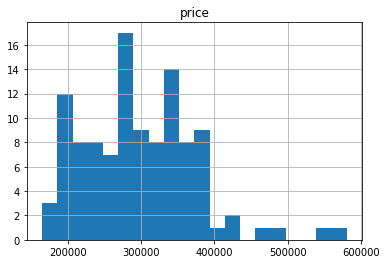

In [16]:
df1[df1['level5']=='Arroyomolinos (Madrid)'].hist(column='price', bins = 20)

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [17]:
df_sbelt = df1[df1['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón" ])]
print(df_sbelt)

       Unnamed: 0  id_realEstates  isNew  \
3               4       152776331  False   
94             95       153995577  False   
109           110       153586414  False   
161           162       153440116  False   
169           170       153920011  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
161                                    prolucisa       916350416.0   
169                                 grupo tizona       911226046.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

<AxesSubplot:xlabel='level5'>

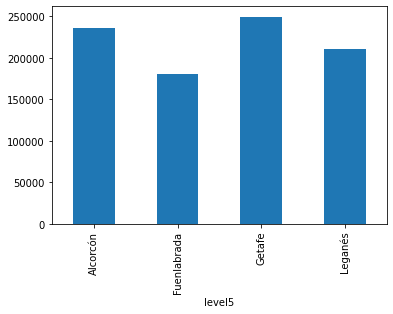

In [18]:
meandf = df_sbelt.groupby('level5')['price'].mean()
meandf.plot(x="level5", y="price", kind="bar")

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [19]:
stats=df_sbelt.groupby('level5')[ 'price', 'rooms', 'surface', 'bathrooms'].agg(['mean', 'var']).reset_index()
stats

/tmp/ipykernel_1061/378744231.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats=df_sbelt.groupby('level5')[ 'price', 'rooms', 'surface', 'bathrooms'].agg(['mean', 'var']).reset_index()


level5          price                   rooms               surface  \
                         mean           var      mean       var        mean   
0     Alcorcón  236345.454545  1.741489e+10  2.889610  1.000806  105.909091   
1  Fuenlabrada  181048.456044  4.738315e+09  3.021978  0.375205  102.516484   
2       Getafe  249675.659091  2.255263e+10  3.136364  0.666252  122.390909   
3      Leganés  211178.670520  1.249217e+10  2.907514  0.828606  106.190751   

               bathrooms            
           var      mean       var  
0  4489.076649  1.642857  0.636321  
1  2069.455528  1.467033  0.338686  
2  5758.083935  1.777273  0.612267  
3  4044.027356  1.543353  0.586772

#### What is the most expensive home of each population? (★★☆) 

In [20]:
stats=df_sbelt.groupby('level5')[ 'price'].agg(['max']).reset_index()
stats

,level5,max
0,Alcorcón,950000
1,Fuenlabrada,490000
2,Getafe,1050000
3,Leganés,650000


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

/tmp/ipykernel_1061/645292206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm['price']=(df_sbelt['price'] - df_sbelt['price'].min()) / \


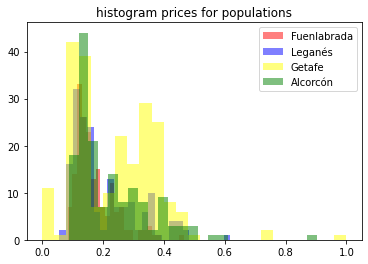

In [21]:
norm=df_sbelt
norm['price']=(df_sbelt['price'] - df_sbelt['price'].min()) / \
        (df_sbelt['price'].max() - df_sbelt['price'].min())
df_f= norm[norm['level5']=="Fuenlabrada"]
df_l= norm[norm['level5']=="Leganés"]
df_g= norm[norm['level5']=="Getafe"]
df_a= norm[norm['level5']=="Alcorcón"]
plt.hist(df_f['price'],bins = 25, alpha = 0.5, color = 'red')
plt.hist(df_l['price'],bins = 25, alpha = 0.5, color = 'blue')
plt.hist(df_g['price'],bins = 25, alpha = 0.5, color = 'yellow')
plt.hist(df_a['price'],bins = 25, alpha = 0.5, color = 'green')
plt.title("histogram prices for populations")
plt.legend(['Fuenlabrada','Leganés','Getafe', 'Alcorcón'])
  
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [22]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps, Marker

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [23]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
for name, lat, lon in df_sbelt[["level5", 'latitude', 'longitude']].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    map.add_layer(marker) 

map.layout.height="550px"

map

Map(bottom=497.0, center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

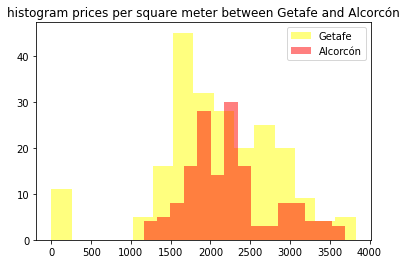

In [24]:
dfg= df1[df1['level5']=="Getafe"]
dfa= df1[df1['level5']=="Alcorcón"]
plt.hist((dfg['price']/dfg['surface']),bins = 15, alpha = 0.5, color = 'yellow')
plt.hist((dfa['price']/dfa['surface']),bins = 15, alpha = 0.5, color = 'red')
plt.title("histogram prices per square meter between Getafe and Alcorcón")
plt.legend(['Getafe', 'Alcorcón'])
  
plt.show()

We can say that the offers in Alcorcón are less than in Getafe, and clustered between 1500 and 2500 while the offers in Getafe are over a wider range. 

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [25]:
df_vg= df1[df1['level5'].isin(["Valdemorillo","Galapagar"])]
stats2=df_vg.groupby('level5')[ 'price'].agg(['mean']).reset_index()
stats2

,level5,mean
0,Galapagar,381106.701493
1,Valdemorillo,384269.565217


It's almost the same.

#### What happens if we do the same analysis for price/m2 (★★☆) 

In [26]:
df_vg['price_m2'] = df_vg['price']/df_vg['surface']
stats3=df_vg.groupby('level5')[ 'price', 'surface', 'price_m2'].agg(['mean']).reset_index()
stats3

/tmp/ipykernel_1061/3927029554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vg['price_m2'] = df_vg['price']/df_vg['surface']
/tmp/ipykernel_1061/3927029554.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats3=df_vg.groupby('level5')[ 'price', 'surface', 'price_m2'].agg(['mean']).reset_index()


,level5,price,surface,price_m2
,,mean,mean,mean
0,Galapagar,381106.701493,321.238806,1566.515392
1,Valdemorillo,384269.565217,363.956522,1321.766036


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

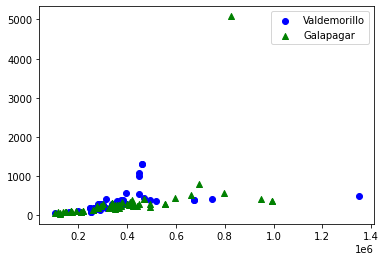

In [27]:
df_v= df1[df1['level5']=="Valdemorillo"]
df_ga= df1[df1['level5']=="Galapagar"]
plt.scatter(df_v['price'], df_v['surface'], c = 'blue', marker='o')
plt.scatter(df_ga['price'], df_ga['surface'], c = 'green', marker='^')
plt.legend(['Valdemorillo', 'Galapagar'])
  
plt.show()

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

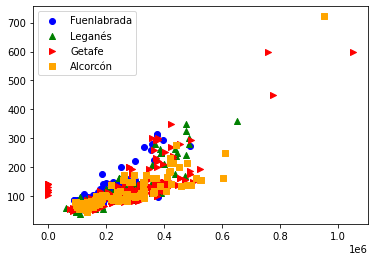

In [28]:
df_f1= df1[df1['level5']=="Fuenlabrada"]
df_l1= df1[df1['level5']=="Leganés"]
df_g1= df1[df1['level5']=="Getafe"]
df_a1= df1[df1['level5']=="Alcorcón"]
plt.scatter(df_f1['price'], df_f1['surface'], c = 'blue', marker='o')
plt.scatter(df_l1['price'], df_l1['surface'], c = 'green', marker='^')
plt.scatter(df_g1['price'], df_g1['surface'], c = 'red', marker='>')
plt.scatter(df_a1['price'], df_a1['surface'], c = 'orange', marker='s')
plt.legend(["Fuenlabrada", "Leganés", 'Getafe', 'Alcorcón'])
  
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [29]:
print("Total agencies: ",df1.realEstate_name.nunique())
print("Agencies and total of properties:\n",df1["realEstate_name"].value_counts())

Total agencies:  1444
Agencies and total of properties:
 engel volkers madrid    447
infocasa consulting     291
housell                 250
solvia inmobiliaria     198
vivienda2               189
                       ... 
iad espana                1
grupo avanzia             1
dalia nuevo milenio       1
embassy canarias          1
montehogar 68             1
Name: realEstate_name, Length: 1444, dtype: int64


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [30]:
print(df1["level5"].value_counts().idxmax())

 Madrid Capital
